# Relatório Parcial

## Alinhamento de Sequências de DNA

Alinhamento de sequências de DNA consiste na comparação entre duas sequências a fim de, por exemplo, tentar relacionar estes dados a funções biológicas ou estruturas presentes nos organismos. Para este estudo, foram utilizados 3 algoritmos: Smith-Waterman, Busca Local e Busca Exaustiva. Para a busca local foi feita com base no conceito de aleatoriedade, artifício muito válido quando utilizado em conjunto com outros. Com relação a busca exaustiva, foram feitas também algumas otimizações.

Este relatório parcial tem como objetivo analisar os tempos de execução destes algoritmos para diferentes tamanhos de entrada, além dos possíveis pontos de lentidão. Os códigos e arquivos para execução estão presentes no repositório. Além disso, serão apresentados alguns trechos que acompanharão as análises neste relatório. Foram utilizados 2 testes para cada tamanho, totalizando em 200 testes.

Uma breve explicação sobre cada algoritmo:

### Algoritmo para alinhamento de sequências de DNA exaustiva
Sendo i o índice do início da substring A, j o índice do início da substring B, k o tamanho das substrings, n o tamanho da sequência A, m o tamanho da sequência B, subA a substring A e subB a substring B, utiliza-se o pseudo-código abaixo para fazer os alinhamentos:

1. k = tamanho da menor sequência

2. Enquanto k >= 2 e k > tamanho mínimo de substring que pode atingir o maior score:

    3. Enquanto i < n-k:

        4. subA = substring de tamanho k a partir do indice i

        5. Enquanto j < m-k:

            6. subB = substring de tamanho k a partir do indice i

            7. Calcular score entre subA e subB

O código no estado atual não percorre todas as possibilidades como um algoritmo exaustivo. Isso ocorre, pois foram efetuadas algumas modificações. A primeira verifica substrings repetidas, ou seja, para cada tamanho k, as substrings verificadas para cada sequência são armazenadas para comparação com as novas substrings geradas. Caso uma esteja previamente armazenada, os loops subsequentes não serão efetuados. Além disso, a partir do score máximo, é calculado o tamanho de string mínimo para que seja possível atingir um score igual ou maior, ou seja, como o valor para um match é de 2 pontos, caso o score máximo em certo ponto do algoritmo seja 16, então o tamanho mínimo será 8.

### Algoritmo de Smith Waterman
O algoritmo tem a finalidade de fazer alinhamento local de duas sequências de DNA. Ele utiliza como entrada as duas sequências e o tamanho delas. Sua saída é um arquivo .txt contendo a matriz com os valores, o maior valor encontrado e ambas as sequências alinhadas. 
A abordagem procura encontrar subsequências que maximizam os valores de pareamento. Para calcular a matriz de valores e obter o valor máximo, segue-se o seguinte algoritimo:

1. Inicializar H[i,0]=0, 0≤i≤n

2. Inicializar H[0,j]=0, 0≤j≤m

3. Para cada 1≤i≤n e 1≤j≤m:

    4. Calcular diagonal = H[i-1,j-1] + w(a[i],b[j]),onde w(a[i],b[j])=2 se houve match, w(a[i],b[j])= -1 se houve mismatch ou gap

    5. Calcular deleção  = H[i-1,j] - 1

    6. Calcular inserção = H[i,j-1] - 1

    7. Calcular H[i,j]=máximo (0, diagonal, deleção, inserção)

9. Retornar o máximo de H

Durante o calculo do máximo entre diagonal, deleção e inserção no passo 7, a origem do valor é guardada no H[i,j], ou seja, caso o máximo seja o da diagonal, então a origem guardada é um código referente a diagonal, caso seja de deleção, um código referente a deleção e caso seja de inserção, um código referente a inserção. Para obter as sequências alinhadas pode-se utilizar essas origens dos valores para gerar a sequência da frente para trás e invertê-la no final. 

### Algoritmo para alinhamento de sequências de DNA com aleatoriedade
Sendo i o índice do início da substring A, j o índice do início da substring B, n o tamanho da substring A, m o tamanho da substring B, k o tamanho das substrings e p a quantidade de substrings geradas em B, utiliza-se o pseudo-código abaixo para fazer os alinhamentos:

1. Gerar uma subsequencia sb=b[j,j+1,...,j+k] de b, de tamanho aleatório k, 1<=k<=m, e 0<=j<=m 

2. Gerar um número aleatório inteiro positivo p

3. Gerar p subsequencias sa=a[i,i+1,...,i+k] de a, com tamanho k calculado no passo (1), 0<=i<=n

4. Calcular os scores de cada par (sa,sb) com os pesos wmat, wmis e wgap

5. Devolver o score máximo m entre os scores do passo (4) e as subsequencias associadas a ele

Alguns tratamentos foram efetuados para que o programa funcione corretamente. Primeiramente verifica-se qual a menor sequência entre as duas que serviram de entrada para o cálculo do valor k, evitando que este seja maior que o tamanho de uma das sequências originais. Outro tratamento é que os valores de j devem ser entre 0 e m-k. Os valores de j, k e p são gerados aleatóriamente. Além disso, os valores de wmat, wmis, wgap são os mesmos utilizados no outro projeto (https://github.com/lucaskf1996/SmithWaterman) para que uma comparação possa ser feita eventualmente.
Outras obsevações a serem feitas é que o cálculo do score é feito de caractere em caractere, podendo ter um resultado negativo e que i foi mantido como 0, mas que pode ser facilmente modificado para adicionar mais aleatoriedade à solução.




### Análise de tempo de execução

In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Os tempos de execução foram extraídos utilizando o código python (teste.py) presente no repositório. Estes foram escritos em arquivos .txt e tratados no código abaixo.

Preparando as variáveis para os gráficos:

In [65]:
files = os.listdir("./resultados")
for i in files:
    # print(i)
    if 'smith' in i:
        with open('./resultados/'+i) as f:
            smith = f.read()
    if 'random2' in i:
        with open('./resultados/'+i) as f:
            random2 = f.read()
    if 'random1' in i:
        with open('./resultados/'+i) as f:
            random1 = f.read()
    if 'exaustivo' in i:
        with open('./resultados/'+i) as f:
            exaustivo = f.read()
    if 'teste1' in i:
        with open('./resultados/'+i) as f:
            teste1 = f.read()
    if 'teste2' in i:
        with open('./resultados/'+i) as f:
            teste2 = f.read()        
resultados = {"smith":[0 for x in range(10)], "random":[0 for x in range(10)], "exaustivo":[0 for x in range(10)], "teste1":[0 for x in range(10)], "teste2":[0 for x in range(10)]}

smith = smith.split('\n')
random2 = random2.split('\n')
random1 = random1.split('\n')
exaustivo = exaustivo.split('\n')
teste1 = teste1.split('\n')
teste2 = teste2.split('\n')


smith = [float(x) for x in smith]
random2 = [float(x) for x in random2]
random1 = [float(x) for x in random1]
exaustivo = [float(x) for x in exaustivo]
teste1 = [float(x) for x in teste1]
teste2 = [float(x) for x in teste2]



i=0
while i < len(smith):
    # print(i)
    resultados["smith"].append((smith[i]+smith[i+1])/2)
    resultados["random"].append((random1[i]+random1[i+1]+random2[i]+random2[i+1])/4)
    resultados["exaustivo"].append((exaustivo[i]+exaustivo[i+1])/2)
    resultados["teste1"].append((teste1[i]+teste1[i+1])/2)
    resultados["teste2"].append((teste2[i]+teste2[i+1])/2)
    i+=2

index = len(resultados["exaustivo"])-10

while index>=0:
    resultados["exaustivo"].insert(index, 0)
    resultados["random"].insert(index, 0)
    resultados["smith"].insert(index, 0)
    resultados["teste1"].insert(index, 0)
    resultados["teste2"].insert(index, 0)
    index-=10

x = np.linspace(0, 500, 11)
y = np.linspace(0, 500, 11)

resultados["exaustivo"] = np.resize(resultados["exaustivo"], (11,11))
resultados["random"] = np.resize(resultados["random"], (11,11))
resultados["smith"] = np.resize(resultados["smith"], (11,11))
resultados["teste1"] = np.resize(resultados["teste1"], (11,11))
resultados["teste2"] = np.resize(resultados["teste2"], (11,11))

Com os dados tratados, foram feitos gráficos 3D através da biblioteca plotly:

### Smith-Waterman

In [58]:
fig = go.Figure(go.Surface(
    x = x,
    y = y,
    z = resultados["smith"]))
fig.update_layout(
    title={
        'text': "Smith-Waterman"},
        width=1000,
        height=700
)

fig.show()

No gráfico é possível observar certos picos no tempo de execução. Para tentar esclarecer o motivo para tal efeito, foram feitas novas baterias de testes utilizando o mesmo código com os mesmos testes.

In [59]:
fig = go.Figure(go.Surface(
    x = x,
    y = y,
    z = resultados["teste1"]))
fig.update_layout(
    title={
        'text': "Smith-Waterman"},
        width=1000,
        height=700
)

fig.show()

In [60]:
fig = go.Figure(go.Surface(
    x = x,
    y = y,
    z = resultados["teste2"]))
fig.update_layout(
    title={
        'text': "Smith-Waterman"},
        width=1000,
        height=700
)

fig.show()

Como é possível observar, os picos de tempo de execução não estão presentes nos 3 gráficos ao mesmo tempo. Isto é um indicativo de que possívelmente não é um problema de código em si. Uma possibilidade é que isso seja um problema com o tempo limite do uso da thread alocada para o processo, ou seja, o tempo de uso da thread acaba durante a execução do programa e este é então alocado a outra thread, consequentemente, aumentando o tempo de execução.

### Algoritmo Local

In [61]:
fig = go.Figure(go.Surface(
    x = x,
    y = y,
    z = resultados["random"]))
fig.update_layout(
    title={
        'text': "Local Alignment with Randomness"},
        width=1000,
        height=700
)

fig.show()


### Algoritmo Exaustivo

In [62]:
fig = go.Figure(go.Surface(
    x = x,
    y = y,
    z = resultados["exaustivo"]))
fig.update_layout(
    title={
        'text': "Exhaustive"},
        width=1000,
        height=700
)


fig.show()

Observando os gráficos fica claro que todos estão dependentes dos tamanhos das entradas. Entre os 3 algoritmos, o Smith-Waterman foi o com o menor tempo de execução, além dos melhores scores, algo que teóricamente seria impossível, considerando que um dos outros algoritmos é um exaustivo, ou seja, o score deveria ser no máximo igual. O fato dos scores serem melhores pode ser explicado por pelo fato de que o algoritmo ajusta as strings resultantes caso haja uma inserção ou deleção, efeito não reproduzido nos outros dois. Quanto ao tempo de execução, todos os algoritmos dependem dos tamanhos das entradas, sendo a exaustiva a que mais escala, porém esta, quando comparada ao algoritmo local, possui um score muito melhor.

Abaixo estão representadas os tempos de execução para entradas de de mesmo tamanho n e m:

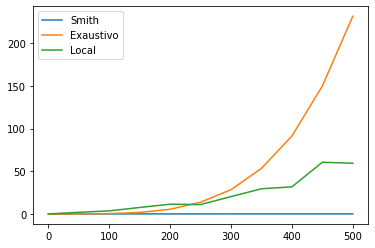

In [73]:
resultados2dSmith = [resultados["smith"][x,x] for x in range(0,11)]
resultados2dExaustivo = [resultados["exaustivo"][x,x] for x in range(0,11)]
resultados2dRandom = [resultados["random"][x,x] for x in range(0,11)]
plt.plot(x, resultados2dSmith, label = "Smith")
plt.plot(x, resultados2dExaustivo, label = "Exaustivo")
plt.plot(x, resultados2dRandom, label = "Local")
plt.legend()
plt.show()

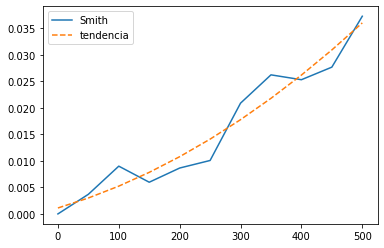

In [99]:
z = np.polyfit(x, resultados2dSmith, 2)
p = np.poly1d(z)
plt.plot(x, resultados2dSmith, label = "Smith")
plt.plot(x, p(x), '--', label = "tendencia") 
plt.legend()
plt.show()

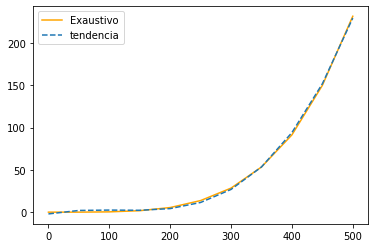

In [108]:
z = np.polyfit(x, resultados2dExaustivo, 3)
p = np.poly1d(z)
plt.plot(x, resultados2dExaustivo, label = "Exaustivo", color = "orange")
plt.plot(x, p(x), '--', label = "tendencia") 
plt.legend()
plt.show()

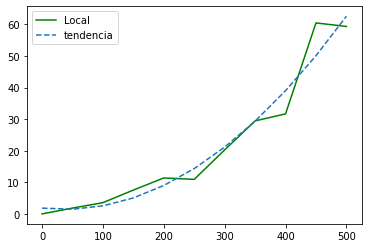

In [106]:
z = np.polyfit(x, resultados2dRandom, 2)
p = np.poly1d(z)
plt.plot(x, resultados2dRandom, label = "Local", color = "green")
plt.plot(x, p(x), '--', label = "tendencia") 
plt.legend()
plt.show()

Analisando os códigos é possível identificar que tanto os algoritmos local e Smith-Waterman são ambos O(n²) por conta dos dois loops aninhados. Para o Smith-Waterman, há dois loops aninhados que iteram sobre os índices das strings de entrada, enquanto que para o local há também dois loops aninhados, porém um para iterar sobre os índices da segunda string e outro para comparar as duas substrings. Para o exaustivo, pode-se afirmar que temos 3 loops aninhados, sendo entre eles um para cada indice de string e outro para comparação das subsmtrings geradas, ou seja, o algoritmo chega a ter complexidade O(n³).

Apesar de ter a mesma complexidade, o algoritmo local possui maior tempo de execução quando comparado ao Smith-Waterman. Isto pode ser explicado uma vez que o primeiro é executado repetidamente por um número fixo de vezes para aumentar as chances de encontrar um score melhor.

Alguns ajustes podem ser feitos no código exaustivo para que o tempo de execução seja menor. Um dos problemas é que para cada k (tamanho de substring) as substrings já analisadas são guardadas em um vetor. Isso para substrings pequenas são muito vantajosas, pois o as possíveis combinações da subsequência de DNA são poucas. Porém os scores altos são encontrados quando k possui valores mais altos e estes scores altos eliminam a necessidade de avaliar as combinações com k pequenos, ou seja, esta modificação que seria útil em um contexto onde k é pequeno, no final não é utilizada, mas as operações de guardar os elementos, fazer as comparações e limpar o vetor ainda são efetuados.

Com relação aos pontos de lentidão presente nos códigos, é possível afirmar que seriam os próprios loops são os agentes causadores. Isto será tratado nas próximas entregas nas quais serão utilizadas métodos de paralelização.